### GSE 21942 - Multiple Sclerosis vs  Healthy

#### Importing libraries

In [1]:
#Importing libraries
import pandas as pd

#### Load the dataset

In [2]:
# Read the tab-separated file into a DataFrame
file_path = r'F:\p-value Final year Project\RSS submission\GSE 21942 - Multiple Sclerosis vs Healthy\GSE21942.top.table.tsv'
df_0 = pd.read_csv(file_path, sep='\t')

# Sorting the df according to gene ID
df = df_0.sort_values(by='ID').reset_index(drop=True)

# Display the DataFrame
print(df)

# Getting the p-values as a numpy array
p_values = df['P.Value'].values.astype(float)
p_values


                         ID  adj.P.Val   P.Value      t     B   logFC  \
0                 1007_s_at   0.389000  0.183000 -1.370 -5.70 -0.1540   
1                   1053_at   0.052800  0.008790  2.810 -3.07  0.2050   
2                    117_at   0.959000  0.919000  0.103 -6.61  0.0173   
3                    121_at   0.151000  0.039100 -2.160 -4.42 -0.0959   
4                 1255_g_at   0.132000  0.032200 -2.250 -4.25 -0.0401   
...                     ...        ...       ...    ...   ...     ...   
54670  AFFX-r2-Ec-bioC-5_at   0.000191  0.000005 -5.610  4.06 -1.3500   
54671  AFFX-r2-Ec-bioD-3_at   0.391000  0.185000 -1.360 -5.71 -0.0952   
54672  AFFX-r2-Ec-bioD-5_at   0.709000  0.532000  0.633 -6.41  0.0607   
54673   AFFX-r2-P1-cre-3_at   0.344000  0.148000  1.490 -5.54  0.0753   
54674   AFFX-r2-P1-cre-5_at   0.125000  0.029800  2.290 -4.18  0.1280   

          Gene.symbol                                         Gene.title  \
0      MIR4640///DDR1  microRNA 4640///discoidi

array([0.183  , 0.00879, 0.919  , ..., 0.532  , 0.148  , 0.0298 ])

#### Histogram of p-values

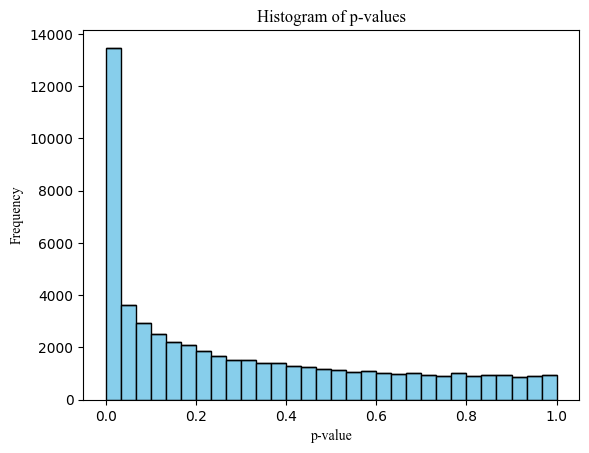

In [3]:
# Checking histogram of p-values
from multidst.utils.visualization import multidst_hist
g2_index = []
multidst_hist(p_values, g2_index, title="Histogram of p-values",col1 = 'skyblue', col2 = 'purple')

#### Classical multiple-testing

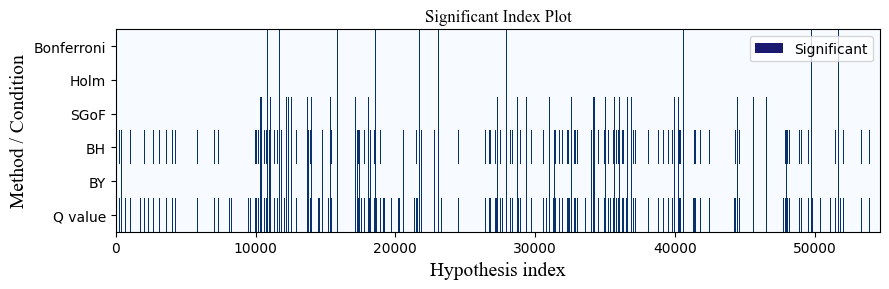


    Uncorrected  Bonferroni  Holm  SGoF    BH    BY  Q-value        pi0 estimate
0        15406         893   898  2836  8904  4086    11767  0.4979839547740783 



In [5]:
# Carrying out multi test
from multidst.functions import multitest
res = multitest(p_values, alpha=0.05,sigplot=True, results = True)

#### Separating NaN genes

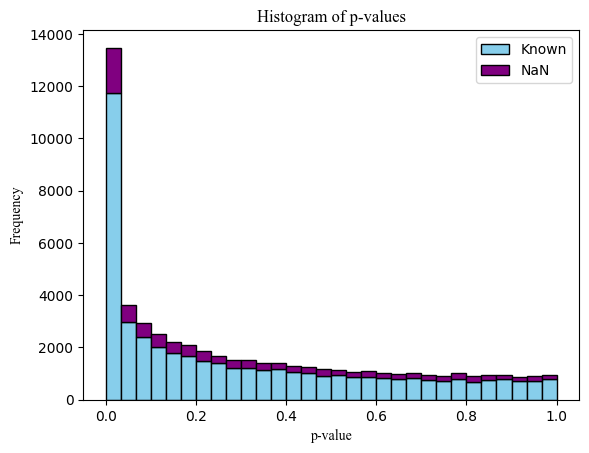

In [6]:
NaN_genes = df[df.isnull().any(axis=1)].index.tolist()

# Checking histogram of p-values
from multidst.utils.visualization import multidst_hist
g2_index = NaN_genes
multidst_hist(p_values, g2_index, title="Histogram of p-values",col1 = 'skyblue', col2 = 'purple', show_legend=True,  left='Known', right = 'NaN')

#### Independent Hypothesis Weighting

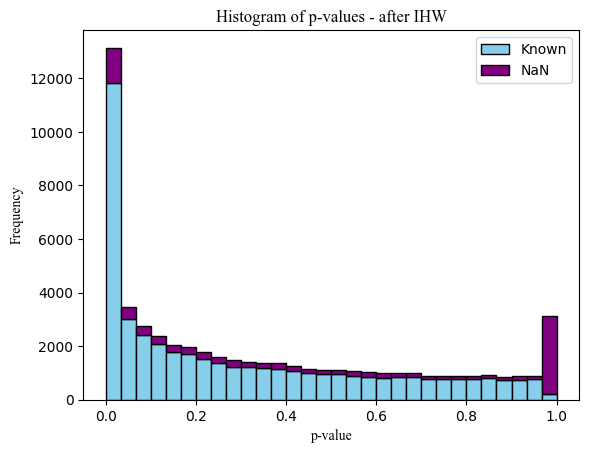

In [7]:
# Creatign IHW p-values
from multidst.utils.weighting import weighted_p_list

# Assigning twice as much weight to known than NaN
weightsIHW = []
for i in range(len(p_values)):
      if i in NaN_genes:
           weightsIHW.append(0.512865) 
      else:
            weightsIHW.append(1.025729)
weightsIHW     

w_ihw, p_ihw = weighted_p_list(p_values, weights=weightsIHW)

multidst_hist(p_ihw, g2_index, title="Histogram of p-values - after IHW",col1 = 'skyblue', col2 = 'purple', show_legend=True,  left='Known', right = 'NaN')

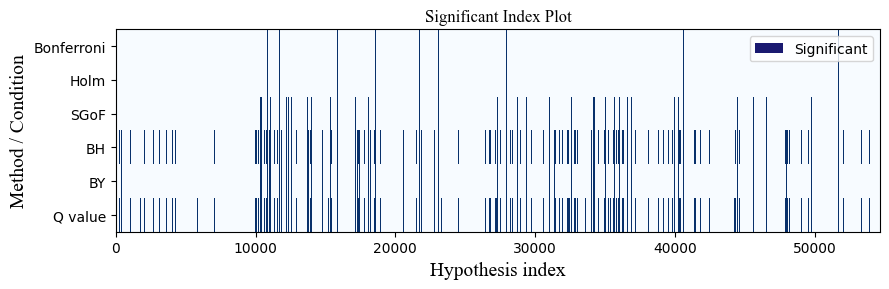


    Uncorrected  Bonferroni  Holm  SGoF    BH    BY  Q-value        pi0 estimate
0        15012         884   890  2836  8686  4025     9242  0.8553019911044604 



In [8]:
# Carrying out MultiDST for a list of IHW p_values
res = multitest(p_ihw, alpha=0.05, sigplot=True, results=True)

In [12]:
# Print out the indices
bonf_p = res['Bonferroni']
holm_p = res['Holm']
sgof_p = res['SGoF']
bh_p = res['BH']
by_p = res['BY']
storey_q = res['Q-value']

#### Finding Gene ID of significant genes

In [14]:
# Rejections in common indices

from multidst.utils import common_indices

coms = common_indices(p_values,bonf_p,holm_p,sgof_p,bh_p,by_p,storey_q)

##### Rejections by all 06

In [38]:
# Rejections by all 06 methods
rejected_by_6 = coms[6]
six_df = df.iloc[rejected_by_6]

In [37]:
six_df_sorted = six_df.sort_values(by='P.Value') 
six_df_sorted

,ID,adj.P.Val,P.Value,t,B,logFC,Gene.symbol,Gene.title,Gene.ID
34496,225239_at,1.010000e-08,1.840000e-13,-13.00,20.40,-2.170,MIR612///NEAT1,microRNA 612///nuclear paraspeckle assembly tr...,693197///283131
10394,200946_x_at,8.050000e-08,4.730000e-12,11.30,17.40,0.961,GLUD1,glutamate dehydrogenase 1,2746
37951,228697_at,8.050000e-08,5.440000e-12,11.30,17.20,3.100,HINT3,histidine triad nucleotide binding protein 3,135114
15071,205624_at,8.050000e-08,8.050000e-12,-11.10,16.90,-2.830,CPA3,carboxypeptidase A3,1359
53118,243869_at,8.050000e-08,8.610000e-12,-11.00,16.80,-0.963,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11558,202110_at,5.620000e-05,9.200000e-07,6.23,5.71,0.511,COX7B,cytochrome c oxidase subunit 7B,1349
10210,200762_at,5.630000e-05,9.250000e-07,6.23,5.70,0.572,DPYSL2,dihydropyrimidinase like 2,1808
15217,205770_at,5.660000e-05,9.310000e-07,6.23,5.70,0.578,GSR,glutathione-disulfide reductase,2936
12179,202731_at,5.690000e-05,9.380000e-07,6.22,5.69,1.120,MIR4680///PDCD4,microRNA 4680///programmed cell death 4 (neopl...,100616113///27250


##### Rejections by none

In [44]:
# Rejections by all 06 methods
rejected_by_0 = coms[0]
len(rejected_by_0)

45433

In [48]:
iter1_df = df.drop(rejected_by_0)
iter1_df

p_values2 = iter1_df['P.Value'].values.astype(float)
p_values2

array([8.79e-03, 8.81e-03, 2.13e-03, ..., 5.97e-04, 2.09e-06, 5.03e-06])

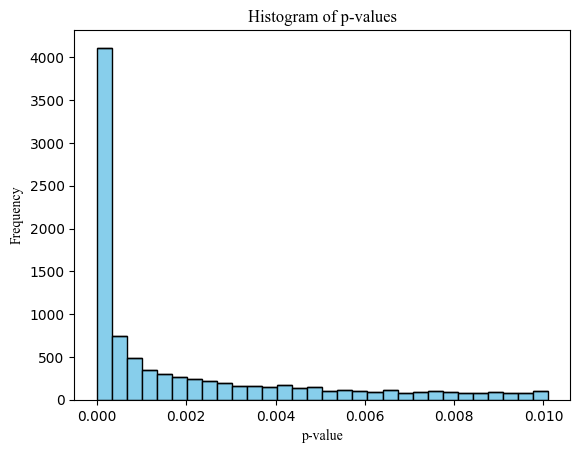

In [49]:
# Checking histogram of p-values
from multidst.utils.visualization import multidst_hist
g2_index = []
multidst_hist(p_values2, g2_index, title="Histogram of p-values",col1 = 'skyblue', col2 = 'purple')

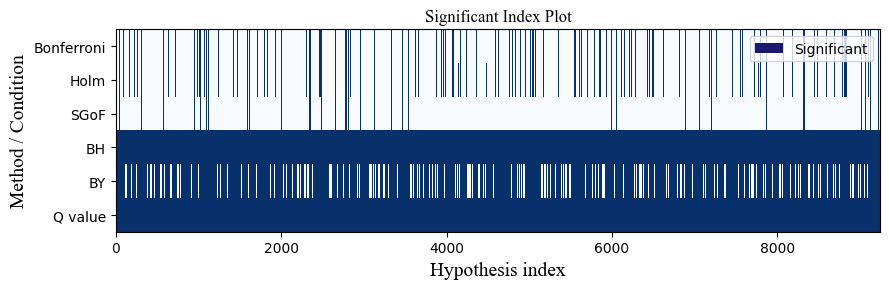


    Uncorrected  Bonferroni  Holm  SGoF    BH    BY  Q-value pi0 estimate
0         9242        1467  1541   504  9242  7448     9242          0.0 



In [51]:
# Carrying out multi test
from multidst.functions import multitest
res = multitest(p_values2, alpha=0.05,sigplot=True, results = True)

In [ ]:
NaN_genes = df[df.isnull().any(axis=1)].index.tolist()

# Checking histogram of p-values
from multidst.utils.visualization import multidst_hist
g2_index = NaN_genes
multidst_hist(p_values, g2_index, title="Histogram of p-values",col1 = 'skyblue', col2 = 'purple', show_legend=True,  left='Known', right = 'NaN')